In [1]:
"""Utility functions"""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="../data"):
	"""Return CSV file path given ticker symbol."""
	return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
	"""Read stock data (adjusted close) for given symbols from CSV files."""
	df = pd.DataFrame(index=dates)
	if 'SPY' not in symbols:  # add SPY for reference, if absent
	    symbols.insert(0, 'SPY')

	for symbol in symbols:
	    # TODO: Read and join data for each symbol
	    symbol_path = symbol_to_path(symbol)
	    df_temp = pd.read_csv(symbol_path,index_col='Date',parse_dates=True,usecols=['Date','Adj Close'],na_values=['nan'])
	    df_temp = df_temp.rename(columns={'Adj Close':symbol})
	    df = df.join(df_temp)
	    if symbol == 'SPY':
	        df = df.dropna(subset=['SPY'])
	    
	return df


def test_run():
	# Define a date range
	dates = pd.date_range('2010-01-01', '2010-12-31')

	# Choose stock symbols to read
	symbols = ['GOOG', 'IBM', 'GLD']
	
	# Get stock data
	df = get_data(symbols, dates)
	print df.mean()
	print "----------------------"
	print df.median()
	print "----------------------"
	print df.std()
	#plot(normalize_data(df))
	

def plot(df, title="Stock prices"):
	ax = df.plot(title=title,fontsize=2)
	ax.set_xlabel("Date")
	ax.set_ylabel("Price")
	plt.show()

def normalize_data(df):
	return df/df.ix[0]

if __name__ == "__main__":
	test_run()

SPY     109.600119
GOOG    535.623095
IBM     126.986627
GLD     120.069762
dtype: float64
----------------------
SPY     108.840
GOOG    534.320
IBM     124.035
GLD     118.755
dtype: float64
----------------------
SPY      5.636382
GOOG    50.460721
IBM      7.472128
GLD      9.537110
dtype: float64


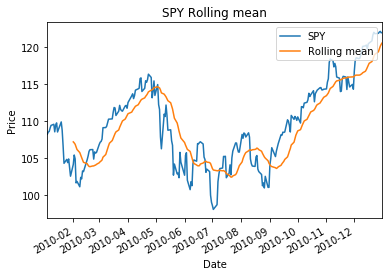

In [2]:
"""Utility functions"""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="../data"):
	"""Return CSV file path given ticker symbol."""
	return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
	"""Read stock data (adjusted close) for given symbols from CSV files."""
	df = pd.DataFrame(index=dates)
	if 'SPY' not in symbols:  # add SPY for reference, if absent
	    symbols.insert(0, 'SPY')

	for symbol in symbols:
	    # TODO: Read and join data for each symbol
	    symbol_path = symbol_to_path(symbol)
	    df_temp = pd.read_csv(symbol_path,index_col='Date',parse_dates=True,usecols=['Date','Adj Close'],na_values=['nan'])
	    df_temp = df_temp.rename(columns={'Adj Close':symbol})
	    df = df.join(df_temp)
	    if symbol == 'SPY':
	        df = df.dropna(subset=['SPY'])
	    
	return df


def test_run():
	# Define a date range
	dates = pd.date_range('2010-01-01', '2010-12-31')

	# Choose stock symbols to read
	symbols = ['GOOG', 'IBM', 'GLD']
	
	# Get stock data
	df = get_data(symbols, dates)
	ax = df['SPY'].plot(title="SPY Rolling mean", label='SPY')

	rm_SPY = pd.Series(df['SPY']).rolling(window=20).mean()
	rm_SPY.plot(label='Rolling mean',ax=ax)	

	ax.set_xlabel('Date')
	ax.set_ylabel('Price')
	ax.legend(loc='upper right')	
	plt.show()	

def plot(df, title="Stock prices"):
	ax = df.plot(title=title,fontsize=2)
	ax.set_xlabel("Date")
	ax.set_ylabel("Price")
	plt.show()

def normalize_data(df):
	return df/df.ix[0]

if __name__ == "__main__":
	test_run()

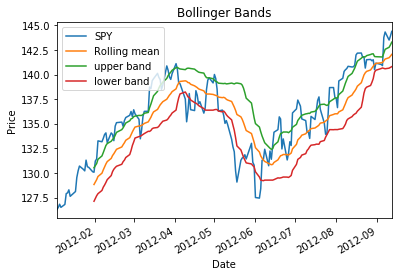

In [3]:
"""Bollinger Bands."""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="../data"):
	"""Return CSV file path given ticker symbol."""
	return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
	"""Read stock data (adjusted close) for given symbols from CSV files."""
	df = pd.DataFrame(index=dates)
	if 'SPY' not in symbols:  # add SPY for reference, if absent
	    symbols.insert(0, 'SPY')

	for symbol in symbols:
	    df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
	            parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
	    df_temp = df_temp.rename(columns={'Adj Close': symbol})
	    df = df.join(df_temp)
	    if symbol == 'SPY':  # drop dates SPY did not trade
	        df = df.dropna(subset=["SPY"])

	return df


def plot_data(df, title="Stock prices"):
	"""Plot stock prices with a custom title and meaningful axis labels."""
	ax = df.plot(title=title, fontsize=12)
	ax.set_xlabel("Date")
	ax.set_ylabel("Price")
	plt.show()


def get_rolling_mean(values, window):
	"""Return rolling mean of given values, using specified window size."""
	return pd.Series(values).rolling(window=window).mean()


def get_rolling_std(values, window):
	"""Return rolling standard deviation of given values, using specified window size."""
	# TODO: Compute and return rolling standard deviation
	return pd.Series(values).rolling(window=window).std()

def get_bollinger_bands(rm, rstd):
	"""Return upper and lower Bollinger Bands."""
	# TODO: Compute upper_band and lower_band
	upper_band =  rm+rstd
	lower_band = rm-rstd
	return upper_band, lower_band


def test_run():
	# Read data
	dates = pd.date_range('2012-01-01', '2012-12-31')
	symbols = ['SPY']
	df = get_data(symbols, dates)

	# Compute Bollinger Bands
	# 1. Compute rolling mean
	rm_SPY = get_rolling_mean(df['SPY'], window=20)

	# 2. Compute rolling standard deviation
	rstd_SPY = get_rolling_std(df['SPY'], window=20)

	# 3. Compute upper and lower bands
	upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
	
	# Plot raw SPY values, rolling mean and Bollinger Bands
	ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
	rm_SPY.plot(label='Rolling mean', ax=ax)
	upper_band.plot(label='upper band', ax=ax)
	lower_band.plot(label='lower band', ax=ax)

	# Add axis labels and legend
	ax.set_xlabel("Date")
	ax.set_ylabel("Price")
	ax.legend(loc='upper left')
	plt.show()


if __name__ == "__main__":
	test_run()

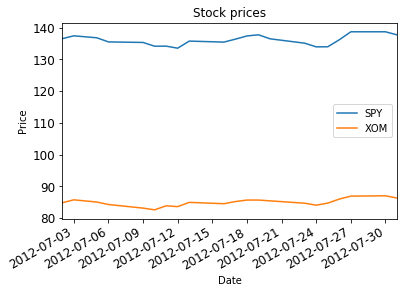

/home/vinay/cs7646/ml4t-venv/lib/python2.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


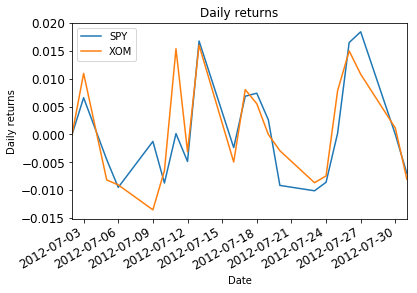

In [4]:
"""Compute daily returns."""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="../data"):
	"""Return CSV file path given ticker symbol."""
	return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
	"""Read stock data (adjusted close) for given symbols from CSV files."""
	df = pd.DataFrame(index=dates)
	if 'SPY' not in symbols:  # add SPY for reference, if absent
	    symbols.insert(0, 'SPY')

	for symbol in symbols:
	    df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
	            parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
	    df_temp = df_temp.rename(columns={'Adj Close': symbol})
	    df = df.join(df_temp)
	    if symbol == 'SPY':  # drop dates SPY did not trade
	        df = df.dropna(subset=["SPY"])

	return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
	"""Plot stock prices with a custom title and meaningful axis labels."""
	ax = df.plot(title=title, fontsize=12)
	ax.set_xlabel(xlabel)
	ax.set_ylabel(ylabel)
	plt.show()


def compute_daily_returns(df):
	"""Compute and return the daily return values."""
	# TODO: Your code here
	# Note: Returned DataFrame must have the same number of rows
	daily_returns = df.copy()
	#daily_returns[1:] = (df[1:]/df[:-1].values)-1
	daily_returns[1:] = (df/df.shift(1))-1
	daily_returns.ix[0,:] = 0

	return daily_returns

def test_run():
	# Read data
	dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
	symbols = ['SPY','XOM']
	df = get_data(symbols, dates)
	plot_data(df)

	# Compute daily returns
	daily_returns = compute_daily_returns(df)
	plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")


if __name__ == "__main__":
	test_run()

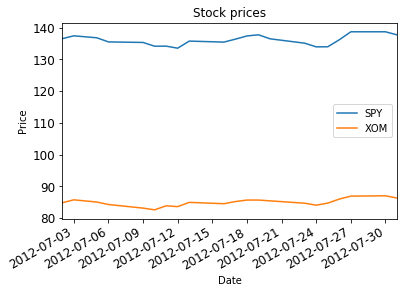

/home/vinay/cs7646/ml4t-venv/lib/python2.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


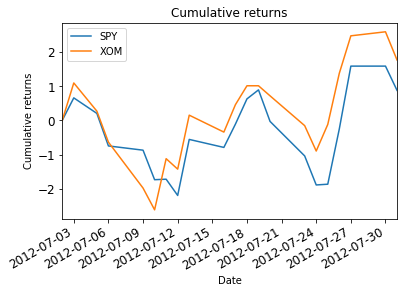

In [5]:
"""Compute daily returns."""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="../data"):
	"""Return CSV file path given ticker symbol."""
	return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
	"""Read stock data (adjusted close) for given symbols from CSV files."""
	df = pd.DataFrame(index=dates)
	if 'SPY' not in symbols:  # add SPY for reference, if absent
	    symbols.insert(0, 'SPY')

	for symbol in symbols:
	    df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
	            parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
	    df_temp = df_temp.rename(columns={'Adj Close': symbol})
	    df = df.join(df_temp)
	    if symbol == 'SPY':  # drop dates SPY did not trade
	        df = df.dropna(subset=["SPY"])

	return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
	"""Plot stock prices with a custom title and meaningful axis labels."""
	ax = df.plot(title=title, fontsize=12)
	ax.set_xlabel(xlabel)
	ax.set_ylabel(ylabel)
	plt.show()


def compute_cumulative_returns(df):
	"""Compute and return the daily return values."""
	# TODO: Your code here
	# Note: Returned DataFrame must have the same number of rows
	cum_returns = df.copy()
	cum_returns = (df/df.ix[0])-1
	return cum_returns*100

def test_run():
	# Read data
	dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
	symbols = ['SPY','XOM']
	df = get_data(symbols, dates)
	plot_data(df)

	# Compute daily returns
	daily_returns = compute_cumulative_returns(df)
	plot_data(daily_returns, title="Cumulative returns", ylabel="Cumulative returns")


if __name__ == "__main__":
	test_run()